In [30]:
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display

import modelsfromscratch.data as data
import modelsfromscratch.setup as setup
import modelsfromscratch.models as models
import modelsfromscratch.train as train
import modelsfromscratch.attnvis as attnvis
import importlib

In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import os
os.chdir('/Users/davidschneider/code/mrcartoonology/modelsfromscratch')

best_step: 3320 loss 1.7935 closest epoch=9 pt=saved_models/20250512-1233/model_epoch09.pt
Tokenizer: Salesforce/codet5-base num_token_ids: 32100
loading data loaders with saved model train/val using 300 files each


Token indices sequence length is longer than the specified maximum sequence length for this model (1708781 > 512). Running this sequence through the model will result in indexing errors


Using device: mps
TransformerLM(
  (token_embed): Embedding(32100, 448)
  (rope_encoder): RotationalPositionalEncoding()
  (transformer_blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (rope_encoder): RotationalPositionalEncoding()
      (multi_headed_attn): MultiHeadAttnWithRoPE(
        (rope_encoder): RotationalPositionalEncoding()
        (Q): Linear(in_features=448, out_features=448, bias=True)
        (K): Linear(in_features=448, out_features=448, bias=True)
        (V): Linear(in_features=448, out_features=448, bias=True)
        (output_proj): Linear(in_features=448, out_features=448, bias=True)
      )
      (ln1): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=448, out_features=1024, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=1024, out_features=448, bias=True)
      )
      (ln2): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
    )
  )
  (logits): Linear(in_

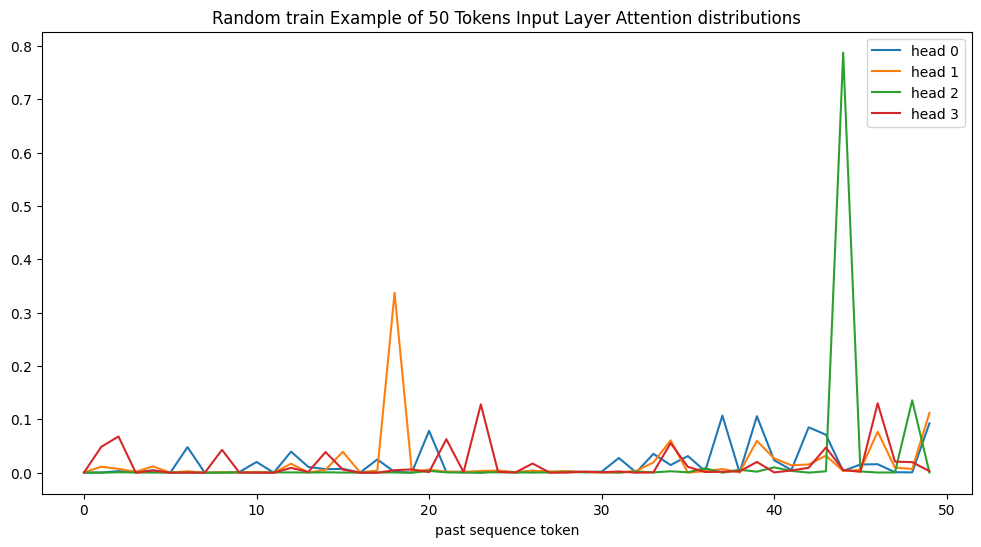

In [42]:
attnvis.vis_attn_over_tokens()

## All Attention Head Distributions

Text(0.5, 0, 'past sequence token')

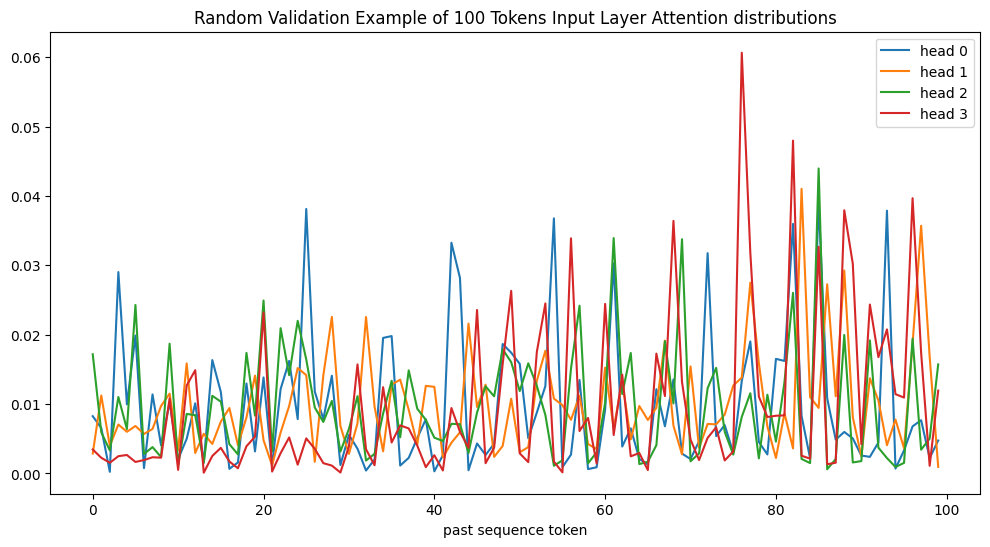

In [27]:
plt.figure(figsize=(12,6))
for ii, h in enumerate(attn_blk1):
    plt.plot(h, label=f'head {ii}')
    plt.legend()
plt.title("Random Validation Example of 100 Tokens Input Layer Attention distributions");
plt.xlabel("past sequence token")

In [21]:
for ii, h in enumerate(attn_blk1):
    attnvis.visualize_attention(tokenizer, ids[0:100], attn00, ids[100])

In [44]:
attn = attnvis.attention_diversity()

best_step: 3320 loss 1.7935 closest epoch=9 pt=saved_models/20250512-1233/model_epoch09.pt
Tokenizer: Salesforce/codet5-base num_token_ids: 32100
loading data loaders with saved model train/val using 300 files each


Token indices sequence length is longer than the specified maximum sequence length for this model (1708781 > 512). Running this sequence through the model will result in indexing errors


Using device: mps
TransformerLM(
  (token_embed): Embedding(32100, 448)
  (rope_encoder): RotationalPositionalEncoding()
  (transformer_blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (rope_encoder): RotationalPositionalEncoding()
      (multi_headed_attn): MultiHeadAttnWithRoPE(
        (rope_encoder): RotationalPositionalEncoding()
        (Q): Linear(in_features=448, out_features=448, bias=True)
        (K): Linear(in_features=448, out_features=448, bias=True)
        (V): Linear(in_features=448, out_features=448, bias=True)
        (output_proj): Linear(in_features=448, out_features=448, bias=True)
      )
      (ln1): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=448, out_features=1024, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=1024, out_features=448, bias=True)
      )
      (ln2): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
    )
  )
  (logits): Linear(in_

In [45]:
lyr0 = attn[0]

In [46]:
lyr0[0].shape


torch.Size([100, 512, 512])

In [55]:
heads = lyr0
seq_len=50

In [59]:
dist.shape

(100, 50)

In [76]:
divscores = attnvis.attention_diversity()

best_step: 3320 loss 1.7935 closest epoch=9 pt=saved_models/20250512-1233/model_epoch09.pt
Tokenizer: Salesforce/codet5-base num_token_ids: 32100
loading data loaders with saved model train/val using 300 files each


Token indices sequence length is longer than the specified maximum sequence length for this model (1708781 > 512). Running this sequence through the model will result in indexing errors


Using device: mps
TransformerLM(
  (token_embed): Embedding(32100, 448)
  (rope_encoder): RotationalPositionalEncoding()
  (transformer_blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (rope_encoder): RotationalPositionalEncoding()
      (multi_headed_attn): MultiHeadAttnWithRoPE(
        (rope_encoder): RotationalPositionalEncoding()
        (Q): Linear(in_features=448, out_features=448, bias=True)
        (K): Linear(in_features=448, out_features=448, bias=True)
        (V): Linear(in_features=448, out_features=448, bias=True)
        (output_proj): Linear(in_features=448, out_features=448, bias=True)
      )
      (ln1): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=448, out_features=1024, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=1024, out_features=448, bias=True)
      )
      (ln2): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
    )
  )
  (logits): Linear(in_

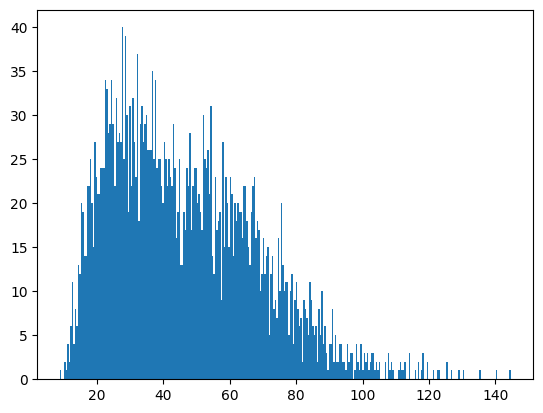

In [78]:
plt.hist(divscores, bins=300);

best_step: 3320 loss 1.7935 closest epoch=9 pt=saved_models/20250512-1233/model_epoch09.pt
Tokenizer: Salesforce/codet5-base num_token_ids: 32100
loading data loaders with saved model train/val using 300 files each


Token indices sequence length is longer than the specified maximum sequence length for this model (1708781 > 512). Running this sequence through the model will result in indexing errors


Using device: mps
TransformerLM(
  (token_embed): Embedding(32100, 448)
  (rope_encoder): RotationalPositionalEncoding()
  (transformer_blocks): ModuleList(
    (0-3): 4 x TransformerBlock(
      (rope_encoder): RotationalPositionalEncoding()
      (multi_headed_attn): MultiHeadAttnWithRoPE(
        (rope_encoder): RotationalPositionalEncoding()
        (Q): Linear(in_features=448, out_features=448, bias=True)
        (K): Linear(in_features=448, out_features=448, bias=True)
        (V): Linear(in_features=448, out_features=448, bias=True)
        (output_proj): Linear(in_features=448, out_features=448, bias=True)
      )
      (ln1): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=448, out_features=1024, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=1024, out_features=448, bias=True)
      )
      (ln2): LayerNorm((448,), eps=1e-05, elementwise_affine=True)
    )
  )
  (logits): Linear(in_

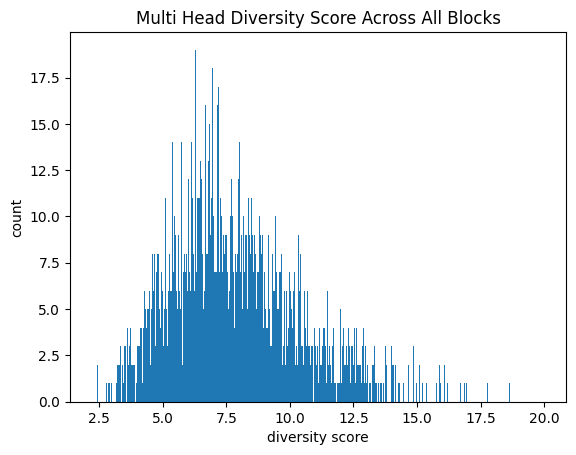

In [89]:
divscores_all_lyrs, lowest, highest = attnvis.attention_diversity(layers=[0,1,2,3])
plt.hist(divscores_all_lyrs, bins=1000);
plt.xlabel('diversity score')
plt.ylabel('count');
plt.title('Multi Head Diversity Score Across All Blocks');

In [92]:
print(lowest['str']), lowest['score']

 not getting gradient since the
            # output is unused in loss computation is supported. Specifically,
            # checks that the grads remain unchanged and are the same as local
            # training.
            inp = torch.randn(10


(None, np.float64(2.24233078865163))

In [93]:
print(highest['str']), highest['score']


        # prune the 4 smallest weights globally by L1 magnitude
        prune.global_unstructured(
            params_to_prune, pruning_method=prune.L1Unstructured, amount=4
        )

       


(None, np.float64(19.96866984490005))

In [95]:
print(tokenizer.decode(lowest['ids'][0:50]))

 not getting gradient since the
            # output is unused in loss computation is supported. Specifically,
            # checks that the grads remain unchanged and are the same as local
            # training.
            inp = torch.randn(


In [96]:
print(tokenizer.decode(highest['ids'][0:50]))


        # prune the 4 smallest weights globally by L1 magnitude
        prune.global_unstructured(
            params_to_prune, pruning_method=prune.L1Unstructured, amount=4
        )




In [99]:
len(tokenizer.decode(highest['ids'][50:]))

7

In [101]:
len(tokenizer.decode(highest['ids'][0:2]))

8

In [102]:
print(tokenizer.decode(highest['ids'][0:2]))

In [103]:
[ord(x) for x in tokenizer.decode(highest['ids'][50:])]

[32, 32, 32, 32, 32, 32, 32]

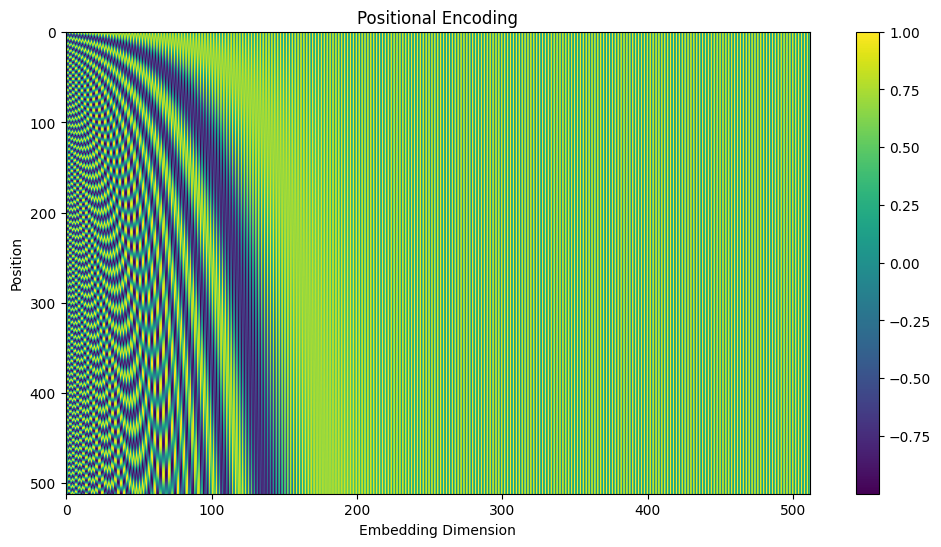

In [ ]:

def positional_encoding(slen, emb_dim, wave_dim=10000):
    """
    Positional encoding for transformer models.
    """
    pos = np.arange(slen)[:, np.newaxis]     # (slen, 1)
    i = np.arange(emb_dim)[np.newaxis, :]    # (1, emb_dim)
    pow = (2 * i) / emb_dim
    angle_rates = 1 / (wave_dim ** pow)
    angle_radians = pos * angle_rates

    encoding = np.zeros((slen, emb_dim))
    encoding[:, 0::2] = np.sin(angle_radians)[:, 0::2]
    encoding[:, 1::2] = np.cos(angle_radians)[:, 1::2]
    return encoding


PE = positional_encoding(512, 512)
plt.figure(figsize=(12, 6))
plt.imshow(PE, aspect='auto')
plt.ylabel('Position')
plt.xlabel('Embedding Dimension')
plt.colorbar()
plt.title('Positional Encoding')
plt.show()

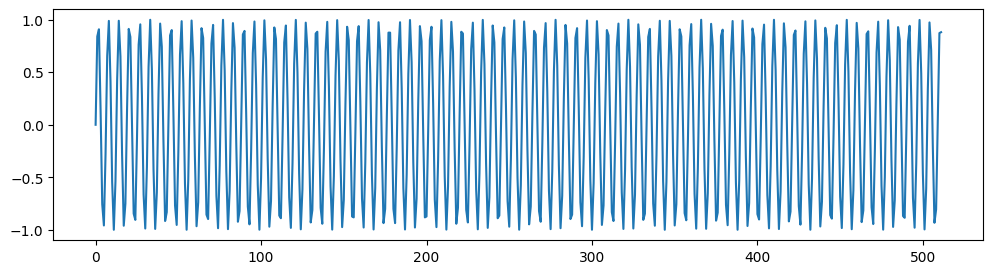

In [19]:
plt.figure(figsize=(12, 3))
plt.plot(PE[:, 0])


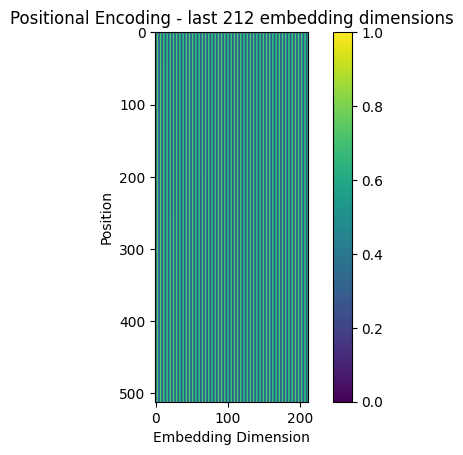

In [15]:
plt.imshow(positional_encoding(512, 512)[:, 300:])
plt.ylabel('Position')
plt.xlabel('Embedding Dimension')
plt.colorbar()
plt.title('Positional Encoding - last 212 embedding dimensions')
plt.show()

In [6]:
nn.Module

torch.nn.modules.module.Module